In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import requests
import warnings
warnings.filterwarnings('ignore')

In [22]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
snp = pd.read_html(requests.get(url).content)[0]
snp.Symbol = snp['Symbol'].str.replace('.','_')
snp.Symbol.tolist()

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BK',
 'BBWI',
 'BAX',
 'BDX',
 'BRK_B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF_B',
 'BLDR',
 'BG',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CHRW',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA'

In [1]:
start_date, end_date = '2015-01-01', '2024-05-31'

df = yf.download(tickers=snp.Symbol.tolist()
                 , start=start_date
                 , end = end_date
                 ).stack()
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','')
df.index.names = ['date', 'ticker']
df

KeyboardInterrupt: 

In [3]:
path = "/Users/amanarya/quant/projects/HMM-on-SnP500/"

df = pd.read_csv(path + 'snp.csv')#.groupby(['date', 'ticker'])
# df.groupby(['date', 'ticker'])
df = df.set_index(['date','ticker'])
df 

adjclose       close        high         low        open  \
date       ticker                                                               
2015-01-02 A        37.551193   40.560001   41.310001   40.369999   41.180000   
           AAL      51.079922   53.910000   54.599998   53.070000   54.279999   
           AAPL     24.402174   27.332500   27.860001   26.837500   27.847500   
           ABBV     44.314442   65.889999   66.400002   65.440002   65.440002   
           ABT      37.481445   44.900002   45.450001   44.639999   45.250000   
...                       ...         ...         ...         ...         ...   
2024-05-30 XYL     139.399994  139.399994  140.160004  137.059998  138.050003   
           YUM     134.839996  134.839996  135.490005  134.360001  135.059998   
           ZBH     114.440002  114.440002  116.220001  114.370003  115.459999   
           ZBRA    316.619995  316.619995  319.549988  315.309998  319.549988   
           ZTS     169.440002  169.440002  174.169998  168.309998  170.679993   

                        volume  
date       ticker               
2015-01-02 A         1529200.0  
           AAL      10748600.0  
           AAPL    212818400.0  
           ABBV      5086100.0  
           ABT       3216600.0  
...                        ...  
2024-05-30 XYL       1751500.0  
           YUM       1587600.0  
           ZBH       1731100.0  
           ZBRA       233800.0  
           ZTS       2904700.0  

[1158065 rows x 6 columns]

In [74]:
(df.reset_index().groupby('date')['ticker'].nunique()).unique()

array([473, 474, 475, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486,
       487, 488, 489, 490, 491, 492, 494, 495, 496, 497, 498, 499, 501])

In [79]:
dg = df.reset_index().drop(['ticker', 'index'], axis=1).groupby('date').mean(numeric_only=True).tail(50)

<Axes: xlabel='open', ylabel='high'>

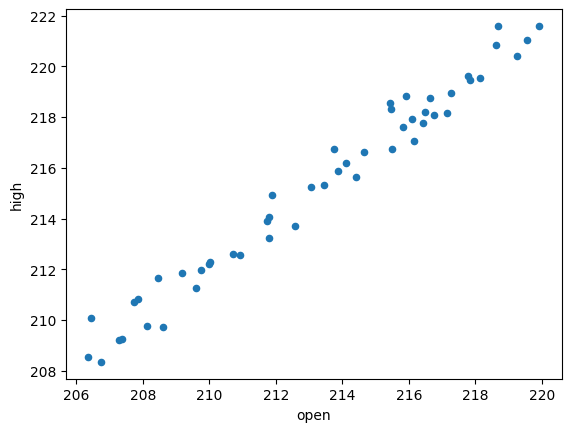

In [83]:
dg.plot(kind='scatter', x='open', y='high')